이미지 선택과 추천 알고리즘

In [1]:
import pandas as pd 

In [2]:
file_path_01 = '01.csv' # validation 1669 장으로 클러스터링한 것. 파일경로+클러스터 번호
clustered_images = pd.read_csv(file_path_01)

In [3]:
clustered_images

,Image_Path,Cluster_Label
0,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,-1
1,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,24
2,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,-1
3,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,-1
4,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,24
...,...,...
1664,E:\AI_HUB\data\Validation\raw_data\VS_photo\h0...,-1
1665,E:\AI_HUB\data\Validation\raw_data\VS_photo\h0...,-1
1666,E:\AI_HUB\data\Validation\raw_data\VS_photo\h0...,-1
1667,E:\AI_HUB\data\Validation\raw_data\VS_photo\h0...,-1


In [4]:
tn_tour_photo_merged_path = r"E:\AI_HUB\data\concatenated\tn_tour_photo_merged.csv"
tn_tour_photo_merged = pd.read_csv(tn_tour_photo_merged_path)

In [5]:
tn_tour_photo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16996 entries, 0 to 16995
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   VISIT_AREA_ID       16996 non-null  int64  
 1   VISIT_AREA_NM       16996 non-null  object 
 2   PHOTO_FILE_NM       16996 non-null  object 
 3   PHOTO_FILE_DT       16996 non-null  object 
 4   PHOTO_FILE_X_COORD  16996 non-null  float64
 5   PHOTO_FILE_Y_COORD  16996 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 796.8+ KB


In [13]:
tn_tour_photo_merged

,VISIT_AREA_ID,VISIT_AREA_NM,PHOTO_FILE_NM,PHOTO_FILE_DT,PHOTO_FILE_X_COORD,PHOTO_FILE_Y_COORD
0,2307010002,제주 국제공항,g00317501099p0002.jpg,2023-07-01 19:57:54,126.388008,34.732722
1,2307010002,제주 국제공항,h00064701002p0002.jpg,2023-07-01 11:39:46,128.324962,34.649425
2,2307010002,제주 국제공항,e00331001002p0001.jpg,2023-07-01 13:51:50,126.607156,37.553997
3,2307010002,제주 국제공항,e00349601003p0001.jpg,2023-07-01 09:17:26,126.618821,37.475521
4,2307010002,제주 국제공항,e00368501002p0001.jpg,2023-07-01 12:48:43,126.606345,37.310702
...,...,...,...,...,...,...
16991,2307200007,제주 국제공항,h00239801007p0018.jpg,2023-07-20 16:17:39,124.609208,37.962464
16992,2306170003,교에 향,h00106002006p0019.jpg,2023-06-17 15:00:13,126.669906,33.426525
16993,2309170004,스타벅스 제주 용담 DT 점,h00664101004p0019.jpg,2023-09-17 18:09:03,126.737097,33.555583
16994,2306250003,제주 국제공항,h00124901004p0020.jpg,2023-06-25 22:31:45,126.322878,33.254447


In [6]:
# 이미지가 저장된 폴더 경로
image_folder = r"E:\AI_HUB\data\Validation\raw_data\VS_photo"

# PHOTO_FILE_NM을 전체 경로로 변환
clustered_images["PHOTO_FILE_NM"] = clustered_images["Image_Path"].apply(lambda x: x.split("\\")[-1])

In [15]:
clustered_images

,Image_Path,Cluster_Label,PHOTO_FILE_NM
0,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,-1,e00106401002p0004.jpg
1,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,24,e00271201099p0004.jpg
2,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,-1,e00301501004p0004.jpg
3,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,-1,e00123601099p0008.jpg
4,E:\AI_HUB\data\Validation\raw_data\VS_photo\e0...,24,e00123601003p0009.jpg
...,...,...,...
1664,E:\AI_HUB\data\Validation\raw_data\VS_photo\h0...,-1,h00667001002p0005.jpg
1665,E:\AI_HUB\data\Validation\raw_data\VS_photo\h0...,-1,h00668401003p0001.jpg
1666,E:\AI_HUB\data\Validation\raw_data\VS_photo\h0...,-1,h00675301002p0003.jpg
1667,E:\AI_HUB\data\Validation\raw_data\VS_photo\h0...,-1,h00665801005p0006.jpg


In [7]:
# 중복 제거 (PHOTO_FILE_NM이 유일한 값이므로 유지)
clustered_images = clustered_images.drop_duplicates(subset=["PHOTO_FILE_NM"])
tn_tour_photo_merged = tn_tour_photo_merged.drop_duplicates(subset=["PHOTO_FILE_NM"])

# PHOTO_FILE_NM을 기준으로 병합 (INNER JOIN)
merged_df = tn_tour_photo_merged.merge(clustered_images, on="PHOTO_FILE_NM", how="inner")

# 데이터 크기 확인
print(f"clustered_images 행 수: {len(clustered_images)}")
print(f"tn_tour_photo_merged 행 수: {len(tn_tour_photo_merged)}")
print(f"merged_df 행 수: {len(merged_df)}")

clustered_images 행 수: 1669
tn_tour_photo_merged 행 수: 16996
merged_df 행 수: 1669


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   VISIT_AREA_ID       1669 non-null   int64  
 1   VISIT_AREA_NM       1669 non-null   object 
 2   PHOTO_FILE_NM       1669 non-null   object 
 3   PHOTO_FILE_DT       1669 non-null   object 
 4   PHOTO_FILE_X_COORD  1669 non-null   float64
 5   PHOTO_FILE_Y_COORD  1669 non-null   float64
 6   Image_Path          1669 non-null   object 
 7   Cluster_Label       1669 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 104.4+ KB


In [8]:
# 선택한 클러스터 리스트
selected_clusters = [1, 3, 4, 5, 6, 8, 10, 12, 16, 23, 25]

# 선택한 클러스터들만 필터링하여 개수 확인
if "Cluster_Label" in merged_df.columns:
    filtered_counts = merged_df[merged_df["Cluster_Label"].isin(selected_clusters)]["Cluster_Label"].value_counts()
    print(filtered_counts)
else:
    print("Error: 'Cluster_Label' 컬럼이 merged_df에 존재하지 않습니다.")

Cluster_Label
6     73
12    40
4     29
25    27
16    21
3     19
8     18
23    18
1     15
10    13
5     12
Name: count, dtype: int64


In [9]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [21]:
print(merged_df[["PHOTO_FILE_NM", "VISIT_AREA_NM"]].head(30))

            PHOTO_FILE_NM     VISIT_AREA_NM
0   h00006301006p0001.jpg               법련사
1   h00011704005p0001.jpg             서문 식당
2   h00015302099p0001.jpg            소노캄 제주
3   f00185202004p0001.jpg          오드란 베이커리
4   f00201101004p0001.jpg     비스타 케이 호텔 월드컵
5   h00024601006p0001.jpg      칼 맞은 삼겹살 노형점
6   h00019801003p0001.jpg            카페 더 씨
7   h00055002004p0001.jpg            카페 더 씨
8   g00137601009p0001.jpg          호텔 더본 제주
9   h00055004003p0001.jpg         제주 렌터카 본사
10  f00208901003p0001.jpg           제주 국제공항
11  g00137602003p0001.jpg           제주 국제공항
12  f00189601003p0001.jpg               빌리가
13  f00208901004p0001.jpg               빌리가
14  h00024604005p0001.jpg               빌리가
15  f00208901009p0001.jpg            플로 웨이브
16  f00209102002p0001.jpg            파더스 가든
17  f00274701004p0001.jpg         제주 돌 문화공원
18  h00018402004p0001.jpg         제주 돌 문화공원
19  f00274701005p0001.jpg            아시진 호텔
20  f00274701008p0001.jpg  걸어가는 늑대들 전이수 갤러리
21  f00276101005p0001.jpg       

In [12]:
# 선택된 클러스터 내에서만 작업
selected_clusters = [1, 3, 4, 5, 6, 8, 10, 12, 16, 23, 25]
merged_df = merged_df[merged_df["Cluster_Label"].isin(selected_clusters)]

# 선택한 클러스터별 대표 이미지 5개 추출 (클러스터 번호 + 이미지명 출력)
representative_images = {}
for cluster in selected_clusters:
    cluster_images = merged_df[merged_df["Cluster_Label"] == cluster]
    if not cluster_images.empty:
        selected_image = cluster_images.sample(n=1, random_state=42)["PHOTO_FILE_NM"].values[0]
        representative_images[cluster] = selected_image


In [13]:
print("사용자에게 제시할 대표 이미지:")
for cluster, image in representative_images.items():
    print(f"클러스터 {cluster}: {image}")

사용자에게 제시할 대표 이미지:
클러스터 1: h00070802006p0012.jpg
클러스터 3: h00275905003p0002.jpg
클러스터 4: f00625101006p0011.jpg
클러스터 5: h00351201008p0016.jpg
클러스터 6: h00439601004p0001.jpg
클러스터 8: h00580902005p0001.jpg
클러스터 10: g00198801004p0008.jpg
클러스터 12: g00021902003p0005.jpg
클러스터 16: h00089403099p0002.jpg
클러스터 23: h00070603005p0002.jpg
클러스터 25: h00070802005p0001.jpg


In [21]:
# 사용자가 선택한 사진 리스트 (예시)
selected_images = ["h00275905003p0002.jpg", "h00351201008p0016.jpg", "g00198801004p0008.jpg"]
recommended_images = recommend_similar_images(selected_images, merged_df)
print("추천된 이미지 리스트:")
for img in recommended_images:
    print(f"파일명: {img['PHOTO_FILE_NM']}, 경로: {img['Image_Path']}")



추천된 이미지 리스트:
파일명: h00645301003p0001.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\h00645301003p0001.jpg
파일명: h00063402006p0003.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\h00063402006p0003.jpg
파일명: h00026401008p0007.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\h00026401008p0007.jpg
파일명: f00085701005p0006.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\f00085701005p0006.jpg
파일명: f00085701005p0007.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\f00085701005p0007.jpg
파일명: h00214902005p0002.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\h00214902005p0002.jpg
파일명: g00461501004p0002.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\g00461501004p0002.jpg
파일명: h00659501004p0003.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\h00659501004p0003.jpg
파일명: h00063402007p0004.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\h00063402007p0004.jpg
파일명: h00437204002p0004.jpg, 경로: E:\AI_HUB\data\Validation\raw_data\VS_photo\h00437204002p0004.jpg
파일명: h0

In [22]:
def recommend_similar_images(selected_images, merged_df):
    recommended_images = []
    
    # 선택한 이미지 리스트를 `PHOTO_FILE_NM`과 매칭되는 형식으로 변환
    selected_images = [img for img in selected_images if img in merged_df["PHOTO_FILE_NM"].values]

    if not selected_images:
        print("경고: 선택한 이미지가 데이터셋에 존재하지 않습니다.")
        return []

    for selected_image in selected_images:
        cluster_info = merged_df.loc[merged_df["PHOTO_FILE_NM"] == selected_image, "Cluster_Label"]
        if cluster_info.empty:
            print(f"경고: {selected_image}에 대한 클러스터 정보가 없습니다.")
            continue

        cluster = cluster_info.values[0]
        if cluster not in selected_clusters:
            print(f"경고: {selected_image}의 클러스터({cluster})가 허용된 클러스터에 포함되지 않습니다.")
            continue

        # 해당 클러스터 내에서 같은 클러스터의 이미지 리스트 가져오기
        cluster_images = merged_df[merged_df["Cluster_Label"] == cluster][["PHOTO_FILE_NM", "Image_Path"]]

        # 선택된 이미지 제외 후 유사한 이미지 추천
        similar_images = cluster_images[cluster_images["PHOTO_FILE_NM"] != selected_image].head(5).to_dict(orient="records")
        recommended_images.extend(similar_images)

    return recommended_images



In [23]:
# 유사 이미지 추천 실행
recommended_images = recommend_similar_images(selected_images, merged_df)
print("추천된 이미지 리스트:", recommended_images)

추천된 이미지 리스트: [{'PHOTO_FILE_NM': 'h00645301003p0001.jpg', 'Image_Path': 'E:\\AI_HUB\\data\\Validation\\raw_data\\VS_photo\\h00645301003p0001.jpg'}, {'PHOTO_FILE_NM': 'h00063402006p0003.jpg', 'Image_Path': 'E:\\AI_HUB\\data\\Validation\\raw_data\\VS_photo\\h00063402006p0003.jpg'}, {'PHOTO_FILE_NM': 'h00026401008p0007.jpg', 'Image_Path': 'E:\\AI_HUB\\data\\Validation\\raw_data\\VS_photo\\h00026401008p0007.jpg'}, {'PHOTO_FILE_NM': 'f00085701005p0006.jpg', 'Image_Path': 'E:\\AI_HUB\\data\\Validation\\raw_data\\VS_photo\\f00085701005p0006.jpg'}, {'PHOTO_FILE_NM': 'f00085701005p0007.jpg', 'Image_Path': 'E:\\AI_HUB\\data\\Validation\\raw_data\\VS_photo\\f00085701005p0007.jpg'}, {'PHOTO_FILE_NM': 'h00214902005p0002.jpg', 'Image_Path': 'E:\\AI_HUB\\data\\Validation\\raw_data\\VS_photo\\h00214902005p0002.jpg'}, {'PHOTO_FILE_NM': 'g00461501004p0002.jpg', 'Image_Path': 'E:\\AI_HUB\\data\\Validation\\raw_data\\VS_photo\\g00461501004p0002.jpg'}, {'PHOTO_FILE_NM': 'h00659501004p0003.jpg', 'Image_Path'

In [17]:
print(merged_df["PHOTO_FILE_NM"].head(10))  # 상위 10개 파일명 출력


6     h00019801003p0001.jpg
7     h00055002004p0001.jpg
23    f00276101010p0001.jpg
25    h00070802004p0001.jpg
29    h00070804007p0001.jpg
30    h00109302003p0001.jpg
49    f00487401002p0001.jpg
55    h00291601099p0001.jpg
61    h00291603002p0002.jpg
64    g00501502005p0001.jpg
Name: PHOTO_FILE_NM, dtype: object


TypeError: string indices must be integers

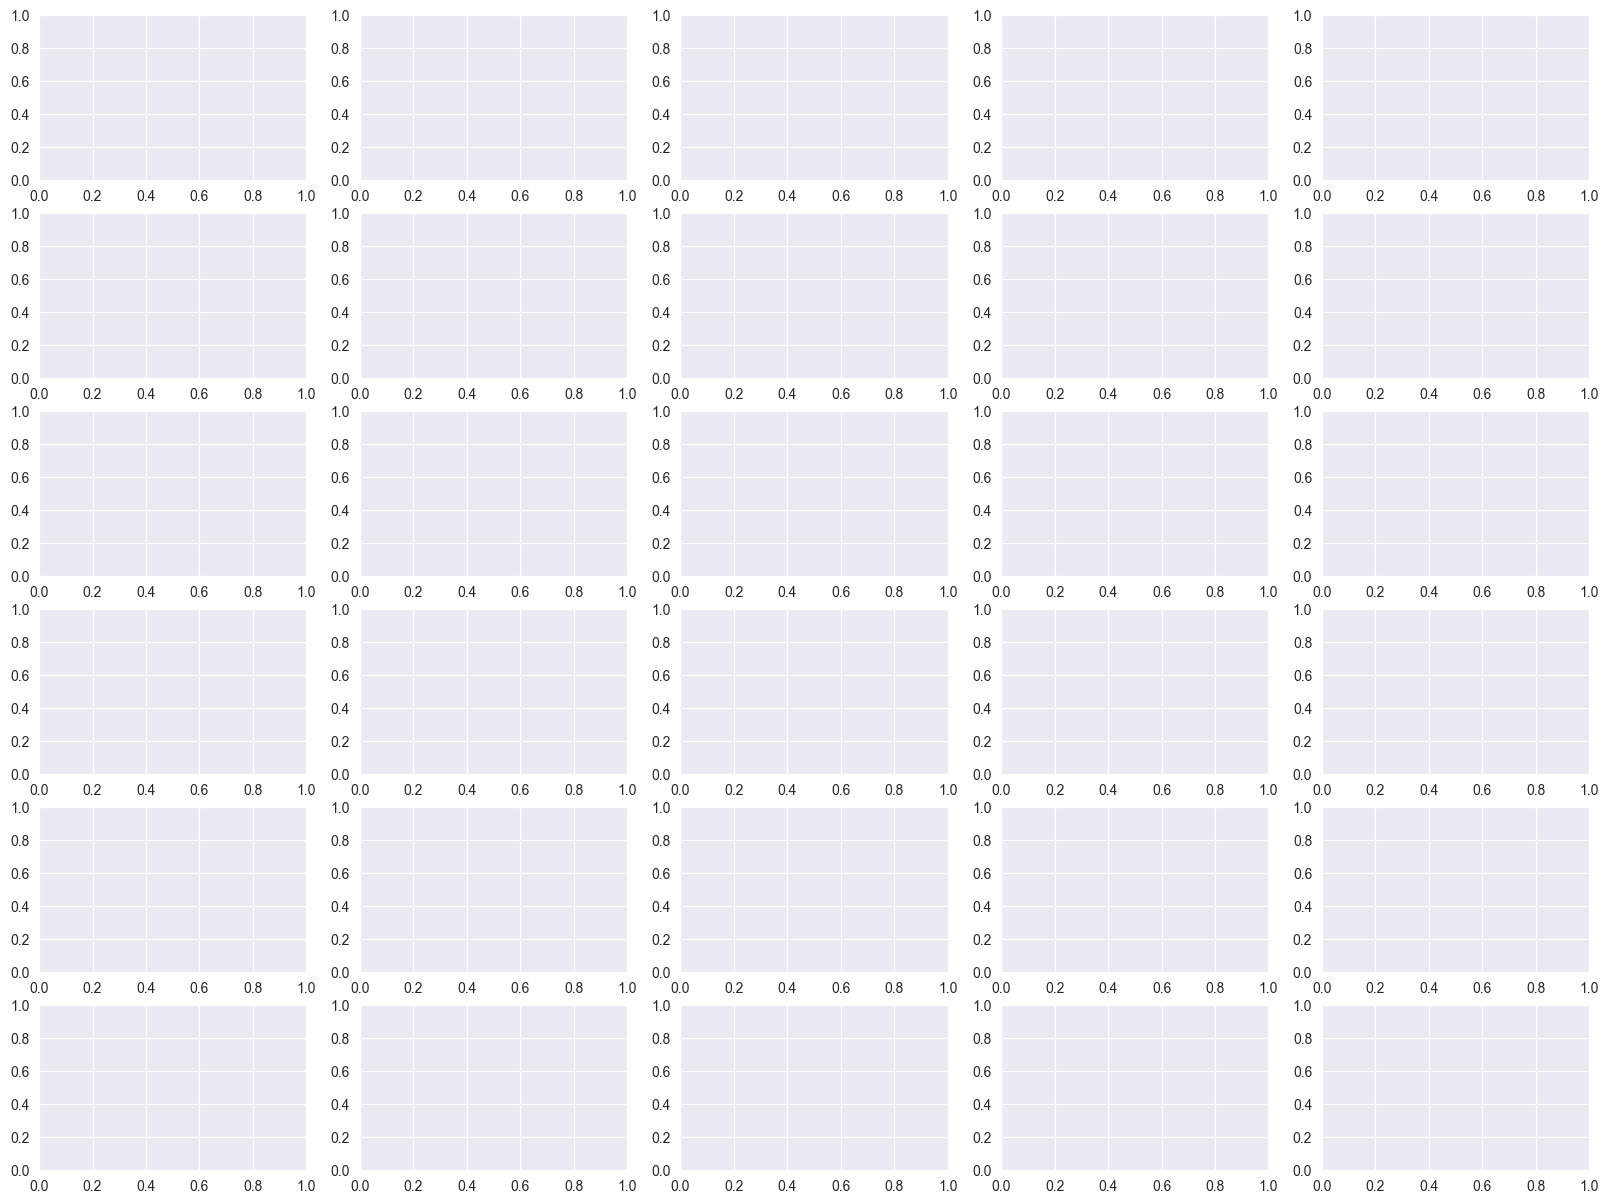

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def visualize_selected_and_recommended(selected_images, recommended_images):
    num_selected = len(selected_images)
    num_recommended = len(recommended_images)

    # 최소한의 추천 이미지를 선택된 이미지 개수와 맞춤
    num_recommendations_per_selected = max(1, num_recommended // num_selected)
    
    fig, axes = plt.subplots(num_selected * 2, num_recommendations_per_selected, figsize=(num_recommendations_per_selected * 4, num_selected * 5))

    if num_selected == 1:
        axes = [axes]  # 1개인 경우 리스트 변환

    for i, selected_image in enumerate(selected_images):
        # 선택한 이미지 불러오기
        selected_path = selected_image["Image_Path"]
        selected_img = mpimg.imread(selected_path) if os.path.exists(selected_path) else None
        
        # 선택한 이미지 표시
        ax = axes[i * 2] if num_recommendations_per_selected == 1 else axes[i * 2, 0]
        ax.imshow(selected_img)
        ax.axis("off")
        ax.set_title(f"사용자가 선택한 이미지: {selected_image['PHOTO_FILE_NM']}")

        # 해당 선택 이미지에 대한 추천 이미지 가져오기
        recommended_subset = recommended_images[i * num_recommendations_per_selected:(i + 1) * num_recommendations_per_selected]

        for j, recommended_image in enumerate(recommended_subset):
            recommended_path = recommended_image["Image_Path"]
            recommended_img = mpimg.imread(recommended_path) if os.path.exists(recommended_path) else None

            # 추천된 이미지 표시
            ax = axes[i * 2 + 1, j] if num_recommendations_per_selected > 1 else axes[i * 2 + 1]
            ax.imshow(recommended_img)
            ax.axis("off")
            ax.set_title(f"추천 이미지: {recommended_image['PHOTO_FILE_NM']}")

    plt.tight_layout()
    plt.show()

# 시각화 실행
visualize_selected_and_recommended(selected_images, recommended_images)
